In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
offset = 2

In [3]:
# Creating a dataset
def toydata(size):
        X, y = make_blobs(n_samples = [size, size], centers = [[0, 0],[offset, offset]])
        y += 1
        return X, y

In [4]:
X, y = toydata(500)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

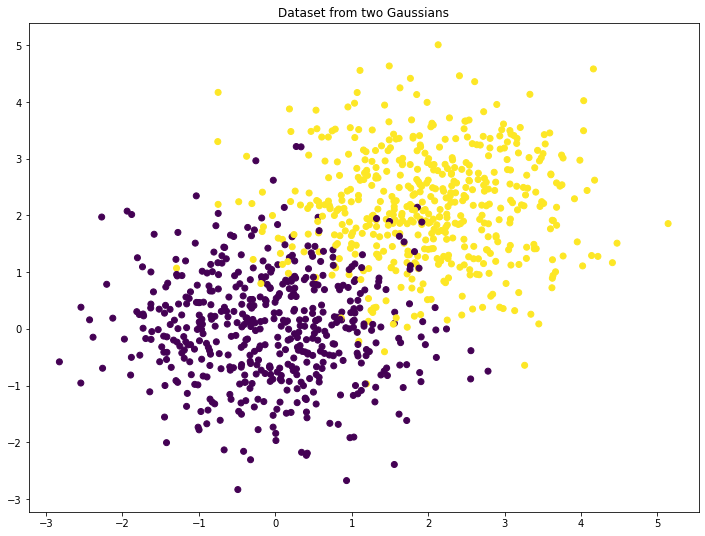

In [7]:
# Plotting the dataset obtained
plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Dataset from two Gaussians")
plt.show()

In [8]:
# Calculating the probability density function
from scipy.stats import multivariate_normal

def pdf(x, mean, sd):
    return multivariate_normal.pdf(x, mean = np.array([mean, mean]), cov = np.array([[sd, 0], [0, sd]]))

In [9]:
def computeybar(x, y, mean1, sd1, mean2, sd2):
    #p(x|y = 1) ∼ N(0, I)
    px_y1 = pdf(x, mean1, sd1)
    #p(x|y = 2) ∼ N(μ2, I)
    px_y2 = pdf(x, mean2, sd2)
    #probability that y = 1, i.e., the data point belongs to class 1
    p_y1 = len(y[y == 1])/len(y)
    #probability that y = 2, i.e., the data point belongs to class 2
    p_y2 = len(y[y == 2])/len(y)
    #probability of x given y = 1 or the data point belongs to class 1
    py1_x = (px_y1 * p_y1)/(px_y1 * p_y1 + px_y2 * p_y2)
    #probability of x given y = 2 or the data point belongs to class 2
    py2_x = (px_y2 * p_y2)/(px_y1 * p_y1 + px_y2 * p_y2)
    #ybar(x): Expected label = ∫ 𝑦𝑃(𝑦|𝑥)𝜕𝑦
    ybar = (1.*py1_x + 2.*py2_x)
    return ybar

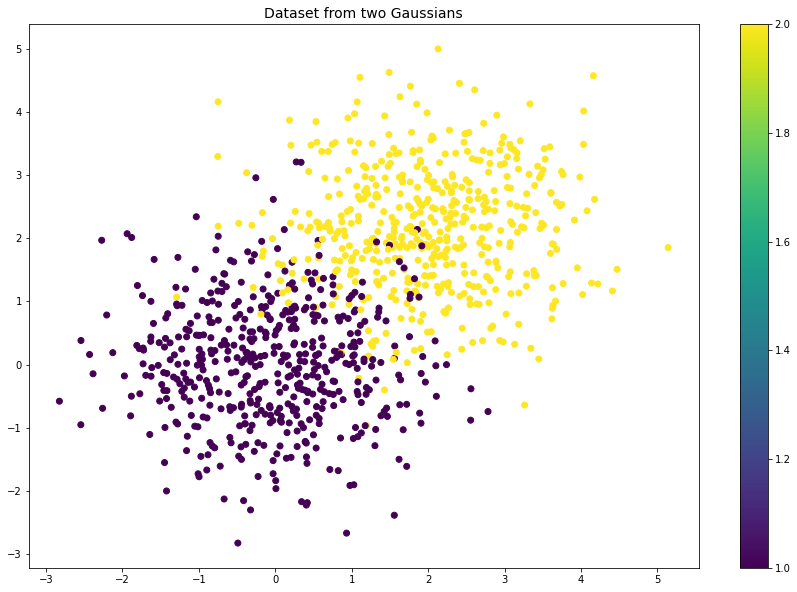

In [10]:
ybar = computeybar(X, y, 0, 1, offset, 1)
plt.figure(figsize = (15, 10))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Dataset from two Gaussians", fontsize = 14)
plt.colorbar()
plt.show()

**(b) Bias(computehbar)**

In [11]:
from sklearn.linear_model import Ridge

In [12]:
def computehbar(test_x, n_models = 100, trainsize = 100, alpha = 1, d = 2):
    
    hd = np.zeros(test_x.shape[0])

    i = 0
    while i < n_models:
        X, y = toydata(size = trainsize)
        classifier = Ridge(alpha = alpha)
        classifier.fit(X, y) 
        hd += classifier.predict(test_x)
        i += 1
        
    return (hd/n_models)

**(c) Variance(computevariance)**

In [13]:
def computevariance(test_x, hbar, n_models = 100, alpha = 1, trainsize = 100, d = 2):
        
    var = np.zeros(test_x.shape[0])

    i = 0
    while i < n_models:
        X, y = toydata(size = trainsize)
        classifier = Ridge(alpha = alpha)
        classifier.fit(X, y)
        hdx = classifier.predict(test_x)
        sq_diff = (hdx - hbar)**2 
        var += sq_diff
        i += 1

    var = np.mean(var)/n_models

    return var

In [14]:
# Calculating the total model error
def computetme(test_x, test_y, n_models = 100, trainsize = 100, alpha = 1):

    total = 0

    for j in range(n_models):
        X, y = toydata(size = train_size)
        classifier = Ridge(alpha = alpha)
        classifier.fit(X, y)
        predictions = classifier.predict(test_x)        
        total += np.mean((predictions - test_y) ** 2)
    total /= n_models

    return total

In [15]:
# Initializing parameters 
train_size = 200
test_size = 50
n_models = 25
alphas = np.arange(-10, 0, 0.5)

# Initializing result variables
bias_arr = np.zeros(len(alphas))
var_arr = np.zeros(len(alphas))
total_arr = np.zeros(len(alphas))
noise_arr = np.zeros(len(alphas))
ed_arr = np.zeros(len(alphas))

**(d) Demo(biasvariancedemo)**

In [17]:
i = 0
while i< len(alphas):
    alpha = 2 ** alphas[i]

    # test data
    test_x, test_y = toydata(size = test_size)

    #total model error
    total = computetme(test_x = test_x, test_y = test_y, n_models = n_models, trainsize = train_size, alpha = alpha)

    # noise
    ybar = computeybar(test_x, test_y, 0, 1, offset, 1)
    noise = np.mean((test_y - ybar) ** 2)
    
    # bias
    hbar = computehbar(test_x = test_x, n_models = n_models, trainsize = train_size, alpha = alpha, d = 2)
    bias = np.mean((hbar - ybar) ** 2)
    
    # variance
    var = computevariance(test_x = test_x, hbar = hbar, n_models = n_models, alpha = alpha, trainsize = train_size, d = 2)

    bias_arr[i] = bias
    var_arr[i] = var
    total_arr[i] = total
    noise_arr[i] = noise
    ed_arr[i] = bias + var + noise

    i += 1

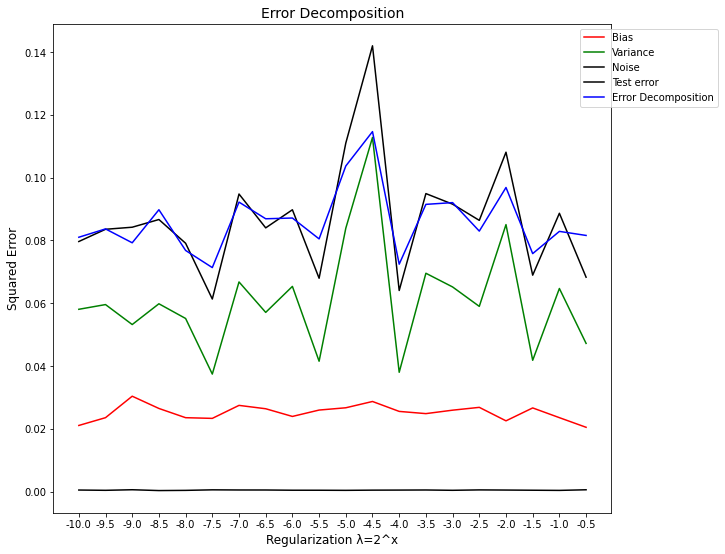

In [18]:
# Plotting the results(bias, noise, variance, error decomposition, test error)
plt.figure(figsize = (10, 9))
plt.plot(bias_arr[:len(alphas)], c = 'r')
plt.plot(noise_arr[:len(alphas)], c = 'g')
plt.plot(var_arr[:len(alphas)], c = 'k')
plt.plot(ed_arr[:len(alphas)], c = 'k')
plt.plot(total_arr[:len(alphas)], c = 'b')

plt.legend(["Bias","Variance","Noise","Test error","Error Decomposition"], loc = 'upper right', bbox_to_anchor = (1.2,1));
plt.xlabel("Regularization λ=2^x", fontsize = 12)
plt.ylabel("Squared Error", fontsize = 12)
plt.title("Error Decomposition", fontsize = 14)
plt.xticks([i for i in range(len(alphas))],alphas);
plt.show()